In [13]:
%matplotlib inline

import json
import logging
import sys

import matplotlib.pyplot as plt
from numpy import median


def draw_plot(name, stats, btc_profit):
    plt.figure(dpi=150)
    plt.axvline(btc_profit, color='k', linestyle='dashed', linewidth=1)
    profits = [s['profit_multiplier'] for s in stats]
    plt.hist(profits, bins=100)
    plt.axvline(median(profits), color='r', linewidth=1)
    plt.title(name)
    plt.show()


def log_stats(name, stats):
    if name == 'BTC':
        logging.info('*BTC*: {:.4f}'.format(stats[0]['profit_multiplier']))
    elif name == 'HODL':
        logging.info('*{}*: {:.4f}'.format(
            name,
            median([s['profit_multiplier'] for s in stats])
        ))
    elif name == 'ARBITRAGE':
        logging.info('*{}*: {:.4f}, rebalances: {:.0f}, tx_fee: ${:.0f}, arbiter profit: ${:.0f}'.format(
            name,
            median([s['profit_multiplier'] for s in stats]),
            median([s['arbitrage_count'] for s in stats]),
            median([s['total_tx_fees'] for s in stats]),
            median([s['total_arbiter_profit'] for s in stats]),
        ))
    else:
        logging.info('*{}*: {:.4f}, rebalances: {:.0f}, tx_fee: ${:.0f}'.format(
            name,
            median([s['profit_multiplier'] for s in stats]),
            median([s['arbitrage_count'] for s in stats]),
            median([s['total_tx_fees'] for s in stats]),
        ))

order = {
    'BTC': 0,
    'HODL': 1,
    '5 MIN': 2,
    '10 MIN': 3,
    '30 MIN': 4,
    'HOUR': 5,
    'DAY': 6,
    'WEEK': 7,
    '2 WEEK': 8,
    'MONTH': 9,
    '5%': 10,
    '10%': 11,
    '20%': 12,
    '50%': 13,
    '100%': 14,
    'ARBITRAGE': 15
}

In [14]:
logging.root.setLevel(logging.INFO)
logging.basicConfig(format='%(message)s')

files = {
    '3-6 tokens, ALL': 'test_data/test_3_6_1_5_1000_all.json',
    '3-6 tokens, UP': 'test_data/test_3_6_1_5_1000_up.json',
    '3-6 tokens, DOWN': 'test_data/test_3_6_1_5_1000_down.json',
    '10-20 tokens, ALL': 'test_data/test_10_20_1_5_1000_all.json'
}

3-6 tokens, ALL

*BTC*: 1.0788
*HODL*: 2.0449
*5 MIN*: 1.9722, rebalances: 62731, tx_fee: $1092775
*10 MIN*: 2.0697, rebalances: 34218, tx_fee: $712768
*30 MIN*: 2.1274, rebalances: 12145, tx_fee: $355092
*HOUR*: 2.0548, rebalances: 6174, tx_fee: $225341
*DAY*: 1.9643, rebalances: 262, tx_fee: $38049
*WEEK*: 1.9667, rebalances: 37, tx_fee: $14715
*2 WEEK*: 2.0317, rebalances: 18, tx_fee: $11427
*MONTH*: 2.2962, rebalances: 8, tx_fee: $10514
*5%*: 3.3554, rebalances: 3514, tx_fee: $336108
*10%*: 2.9747, rebalances: 840, tx_fee: $141721
*20%*: 2.7815, rebalances: 216, tx_fee: $65035
*50%*: 2.7826, rebalances: 44, tx_fee: $28580
*100%*: 2.7265, rebalances: 15, tx_fee: $16819
*ARBITRAGE*: 2.0100, rebalances: 98799, tx_fee: $132974, arbiter profit: $1255325


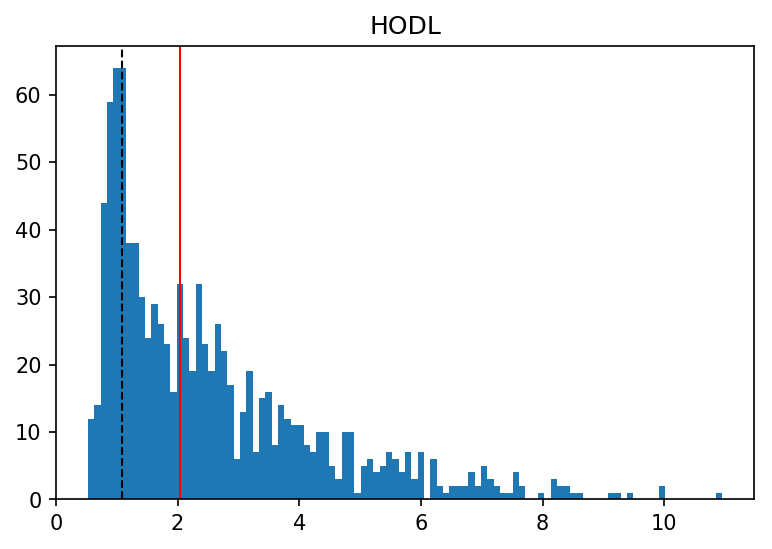

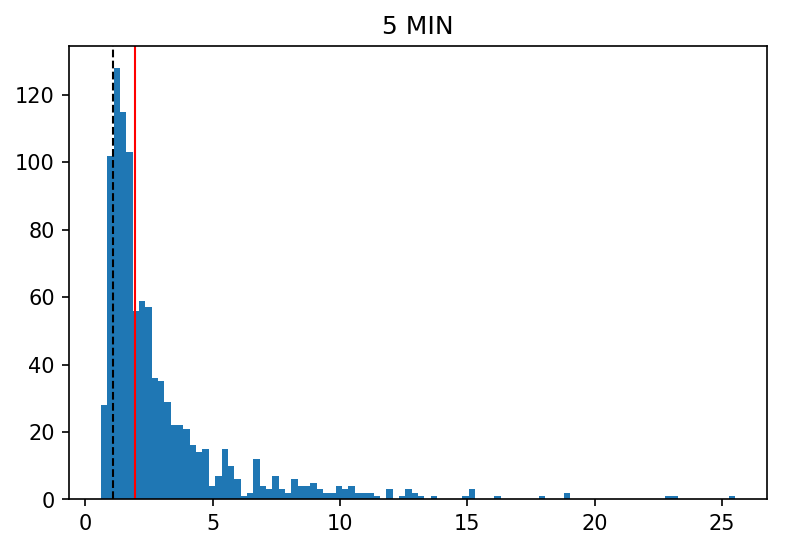

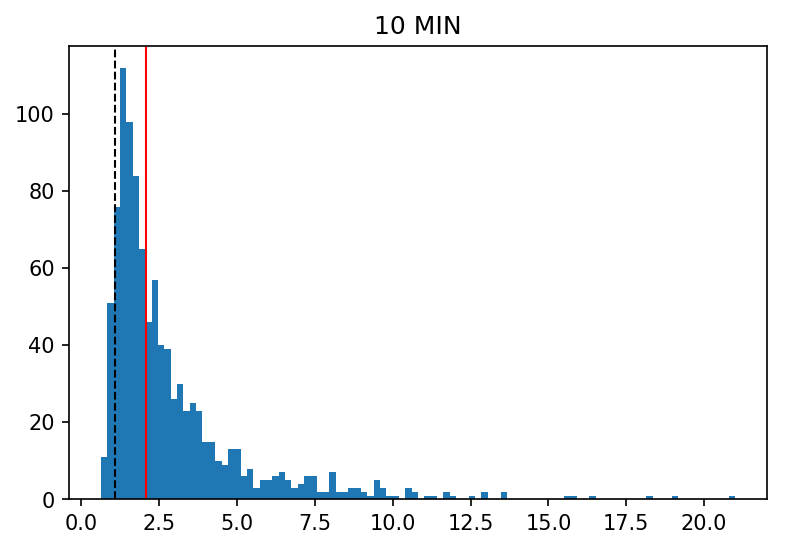

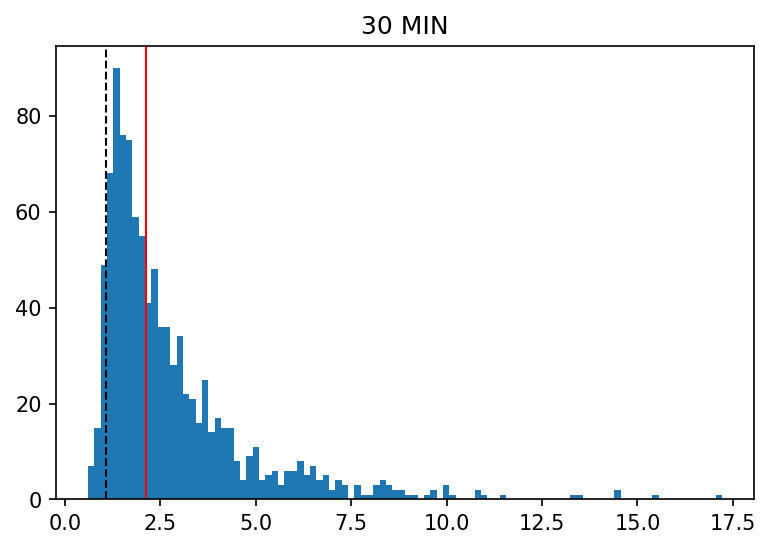

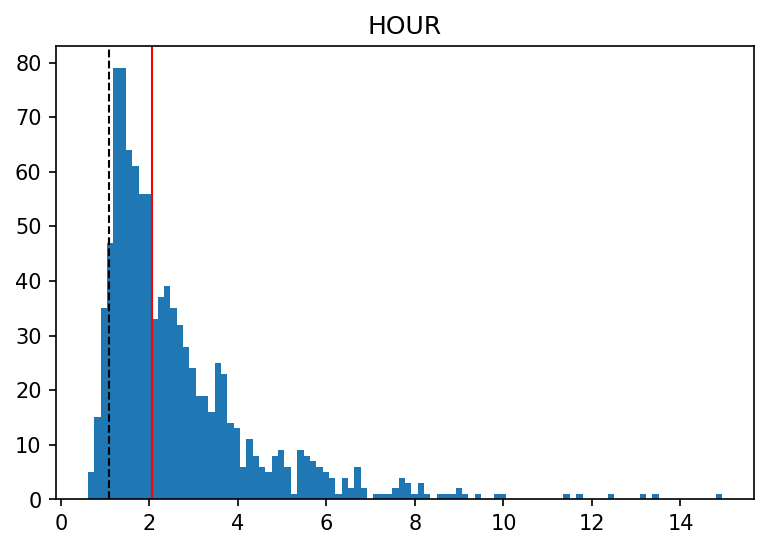

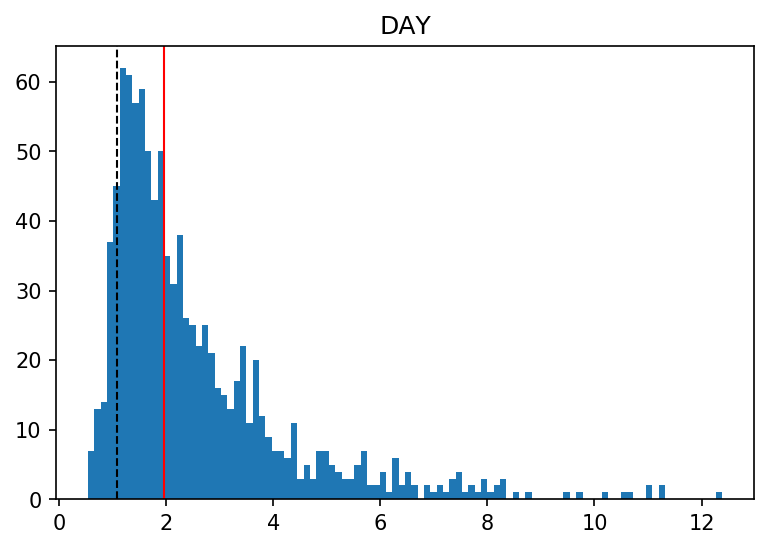

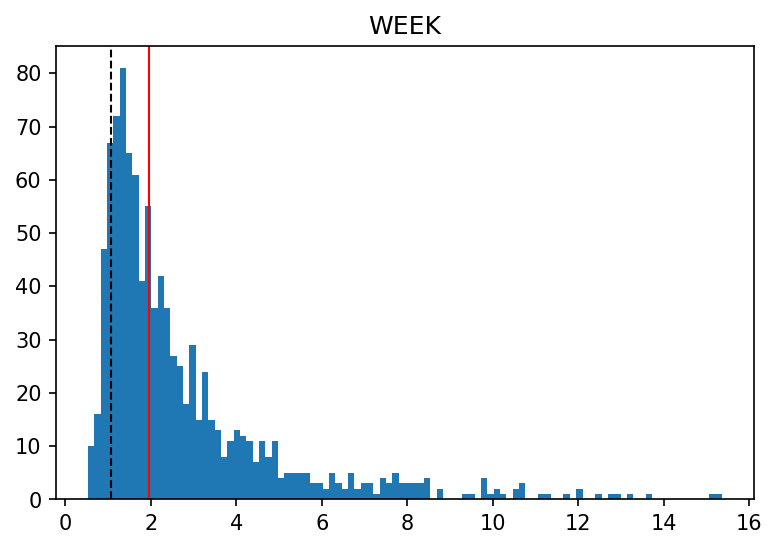

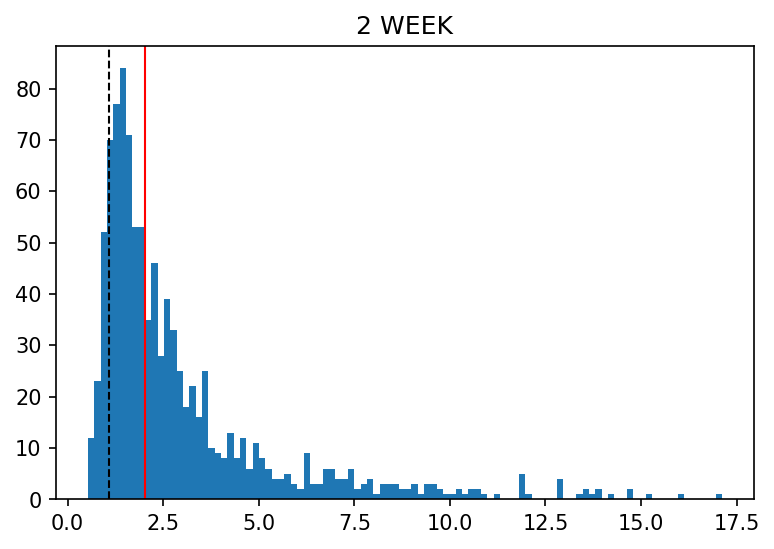

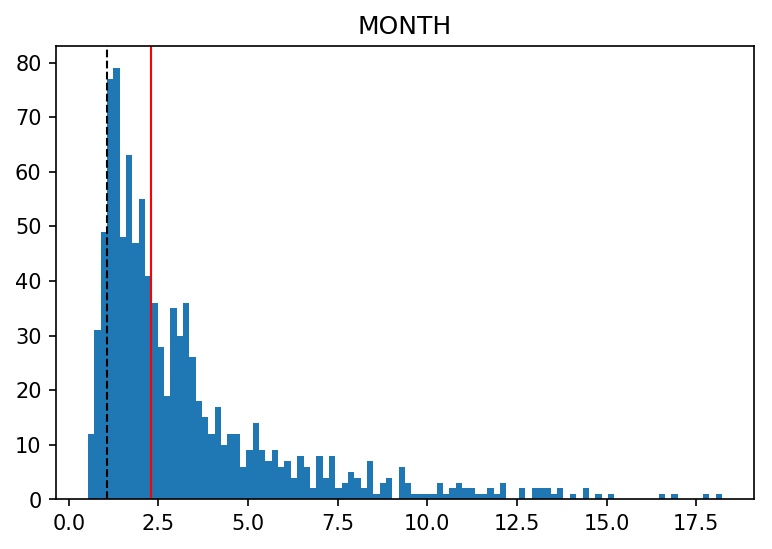

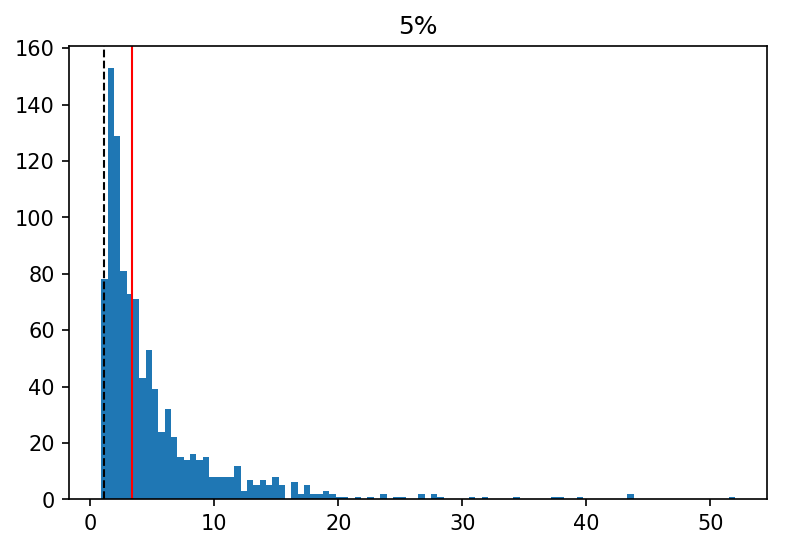

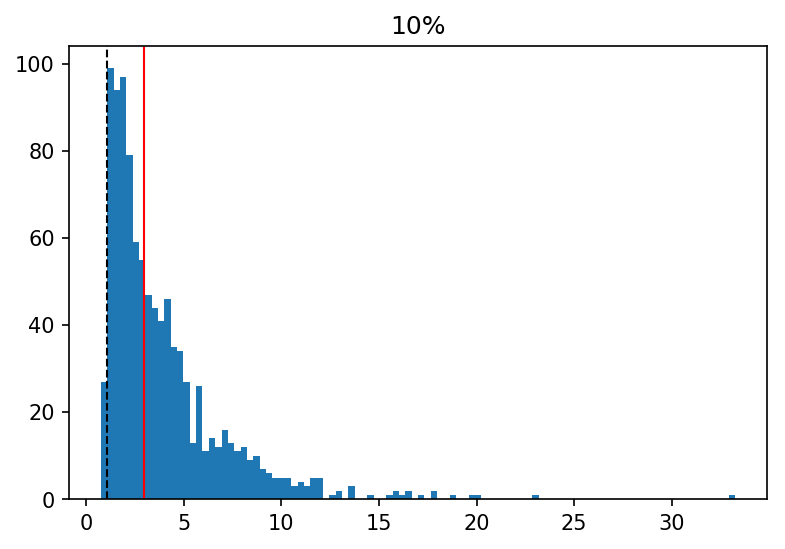

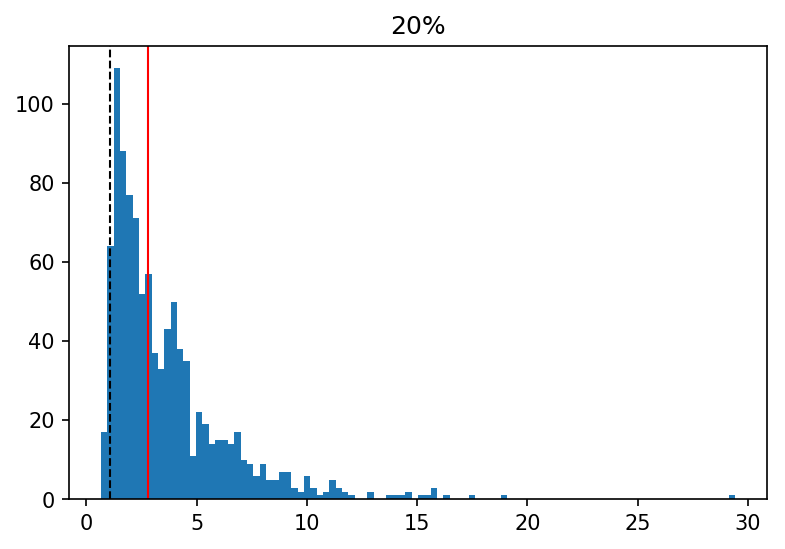

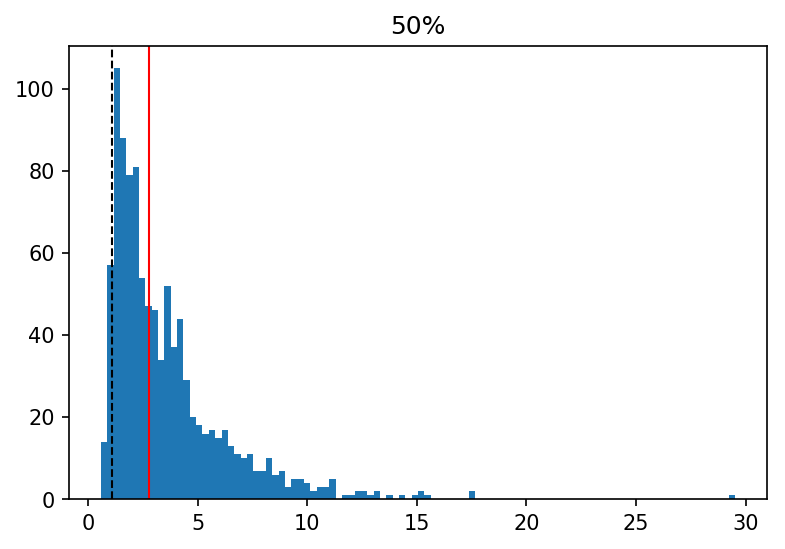

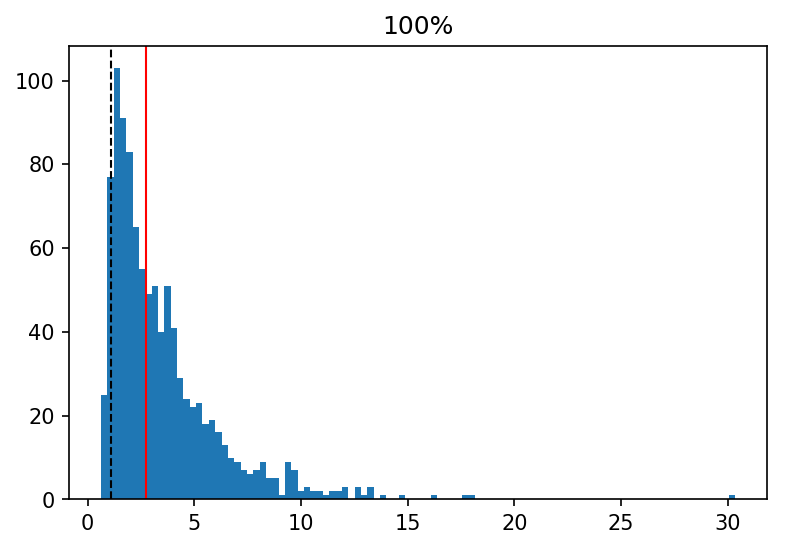

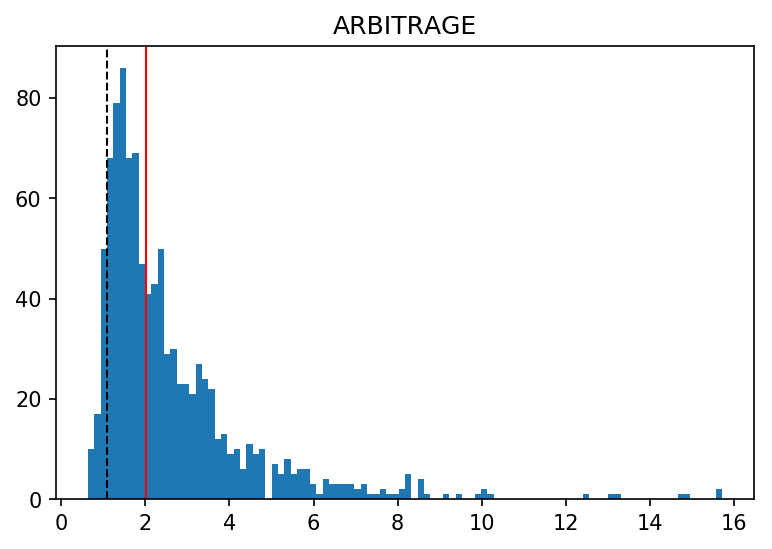

3-6 tokens, UP

*BTC*: 2.2528
*HODL*: 5.8353
*5 MIN*: 6.8412, rebalances: 14035, tx_fee: $325614
*10 MIN*: 6.8306, rebalances: 7656, tx_fee: $216530
*30 MIN*: 6.6966, rebalances: 2718, tx_fee: $111615
*HOUR*: 6.4811, rebalances: 1381, tx_fee: $71806
*DAY*: 6.2697, rebalances: 58, tx_fee: $13001
*WEEK*: 6.2720, rebalances: 8, tx_fee: $5281
*2 WEEK*: 6.4778, rebalances: 4, tx_fee: $4793
*MONTH*: 7.0316, rebalances: 1, tx_fee: $567
*5%*: 9.4340, rebalances: 2206, tx_fee: $181434
*10%*: 8.5836, rebalances: 539, tx_fee: $76868
*20%*: 8.0838, rebalances: 132, tx_fee: $34367
*50%*: 8.0592, rebalances: 27, tx_fee: $15268
*100%*: 8.0917, rebalances: 9, tx_fee: $9649
*ARBITRAGE*: 6.3991, rebalances: 41846, tx_fee: $58505, arbiter profit: $814936


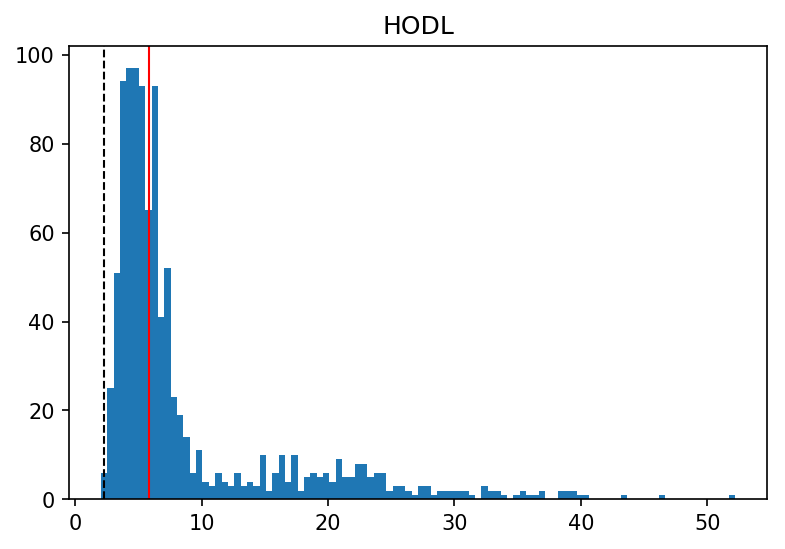

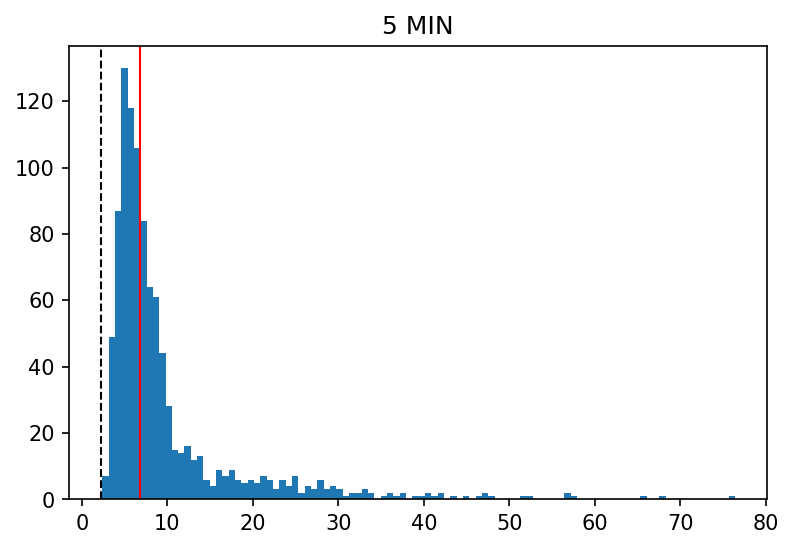

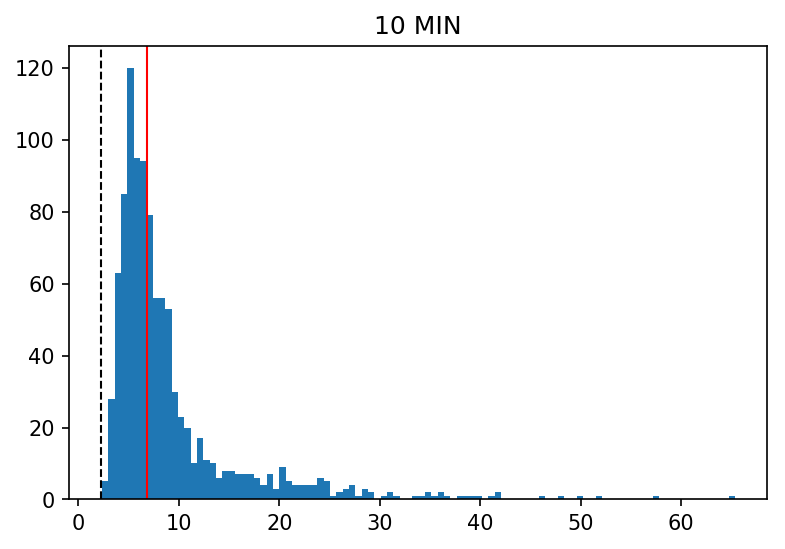

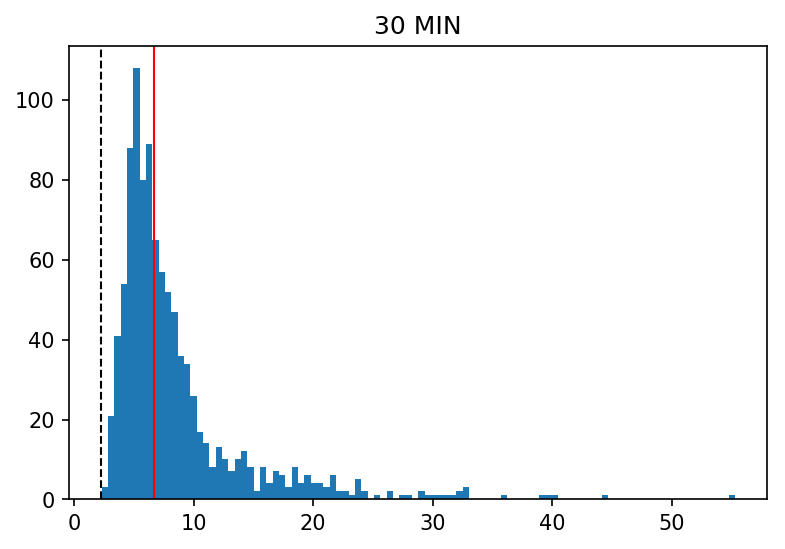

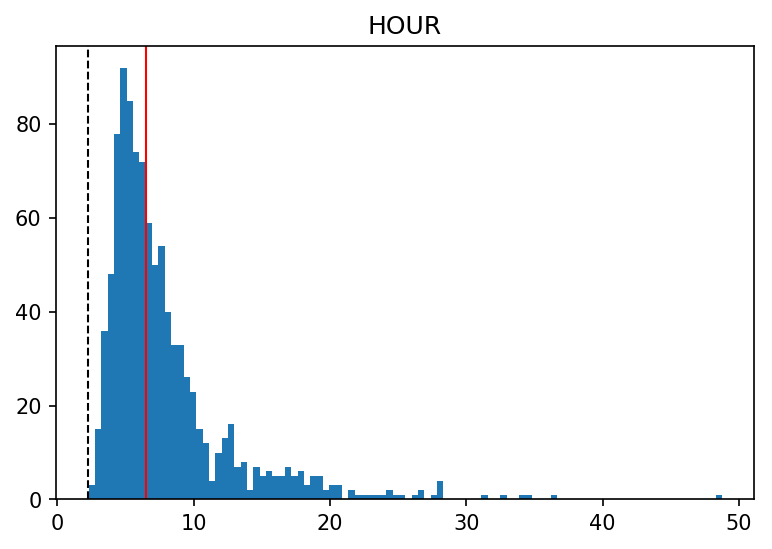

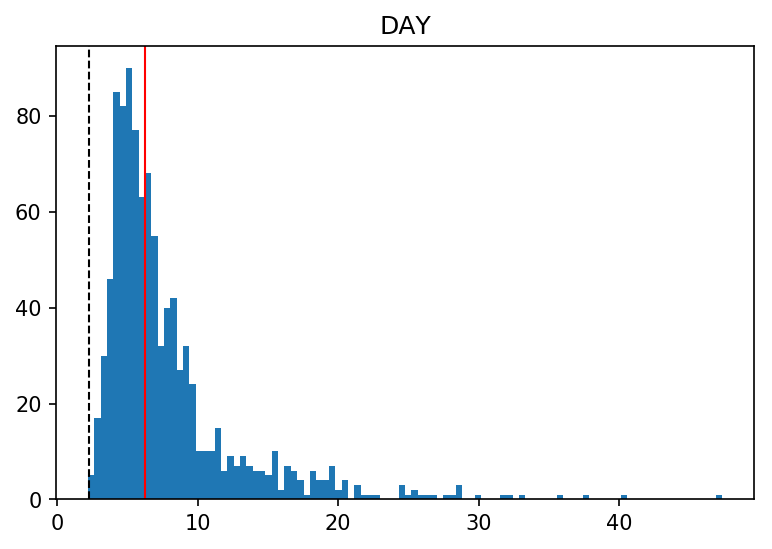

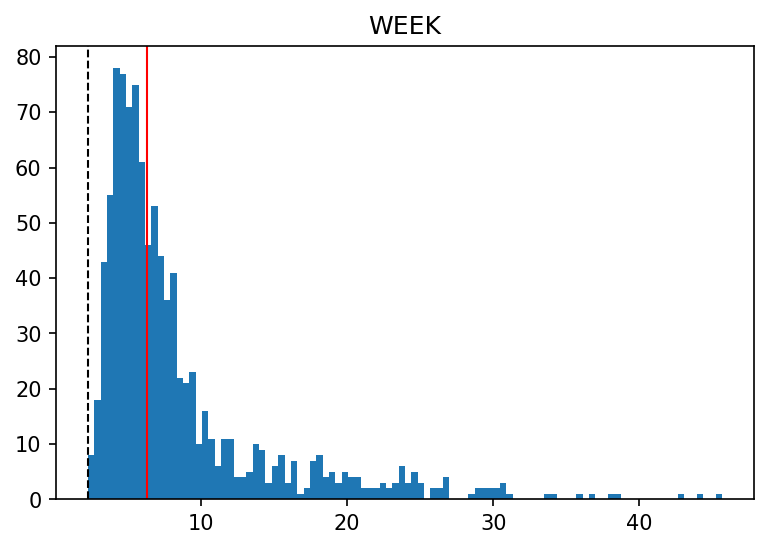

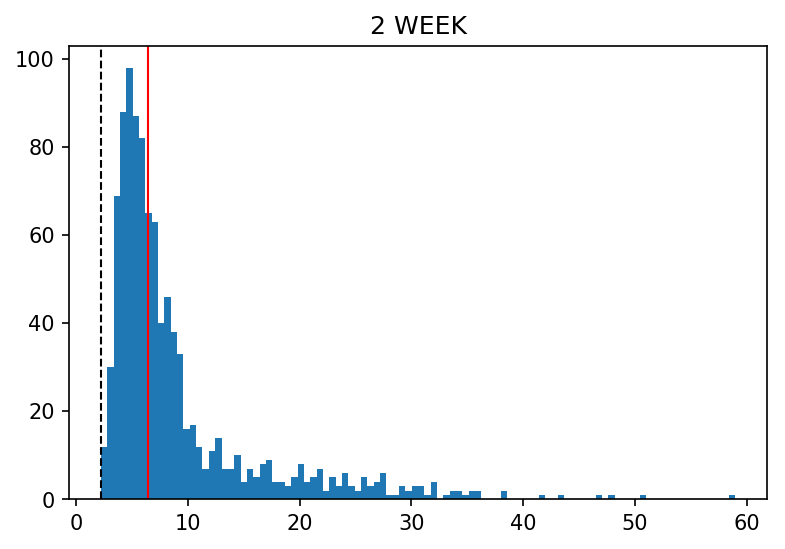

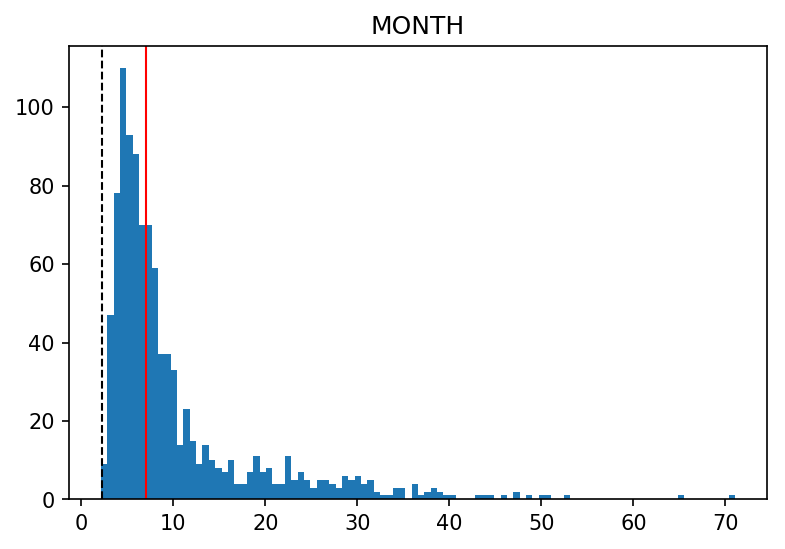

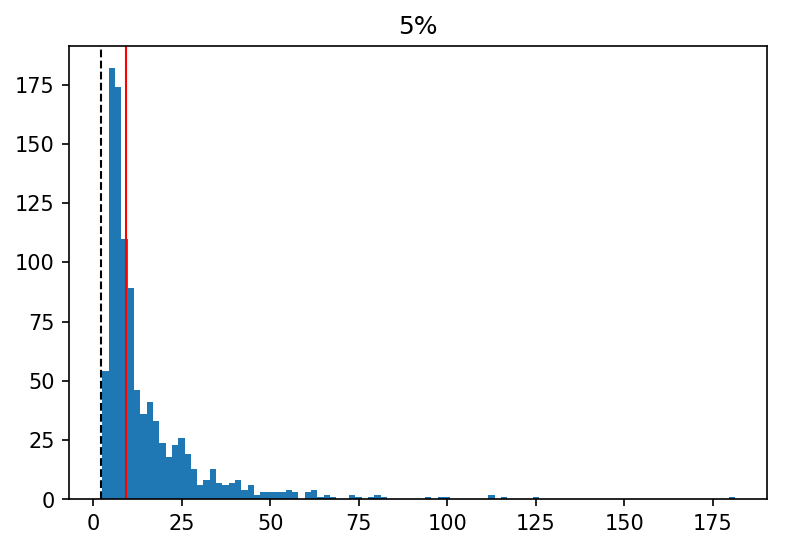

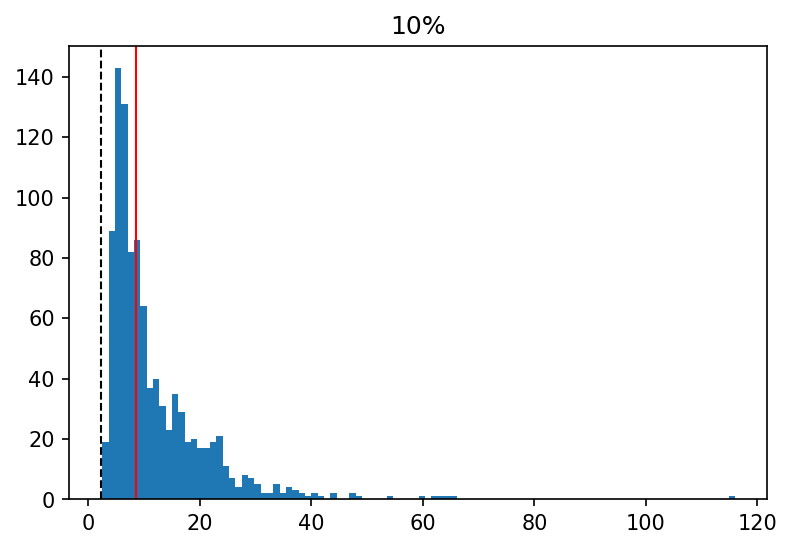

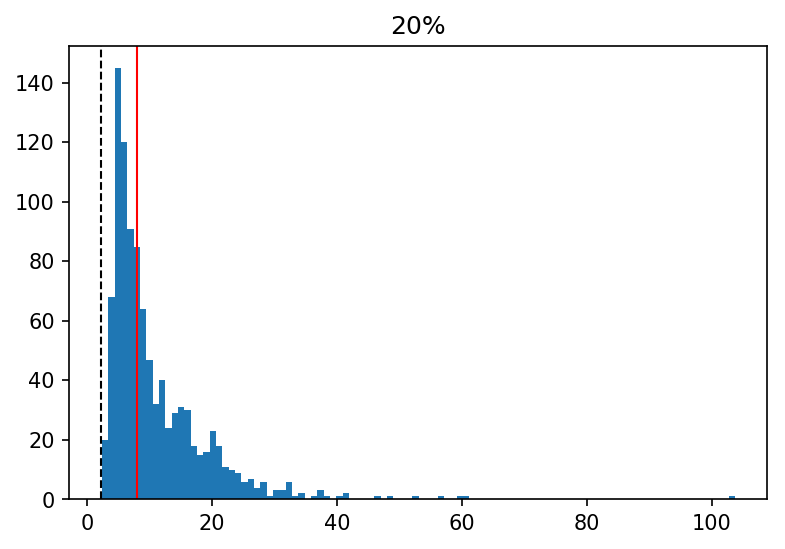

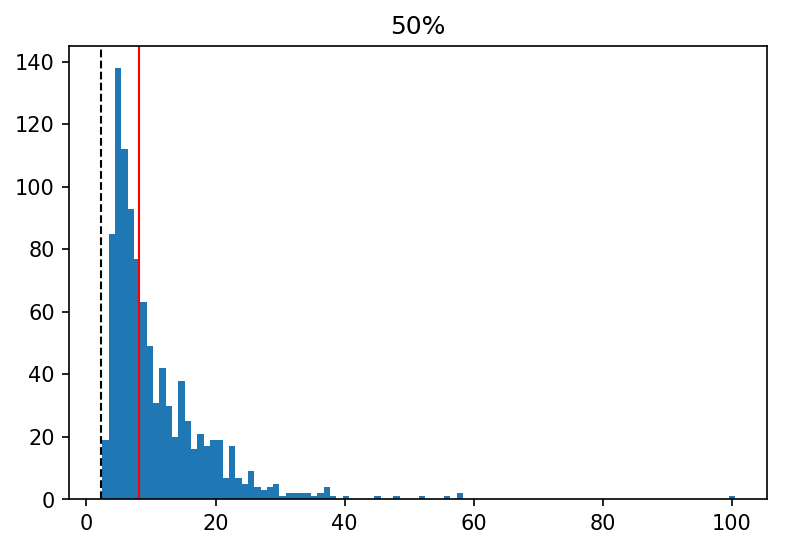

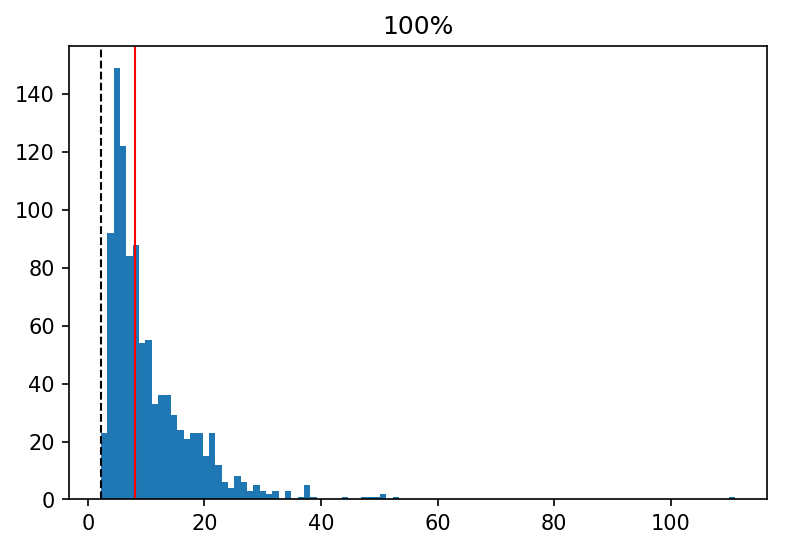

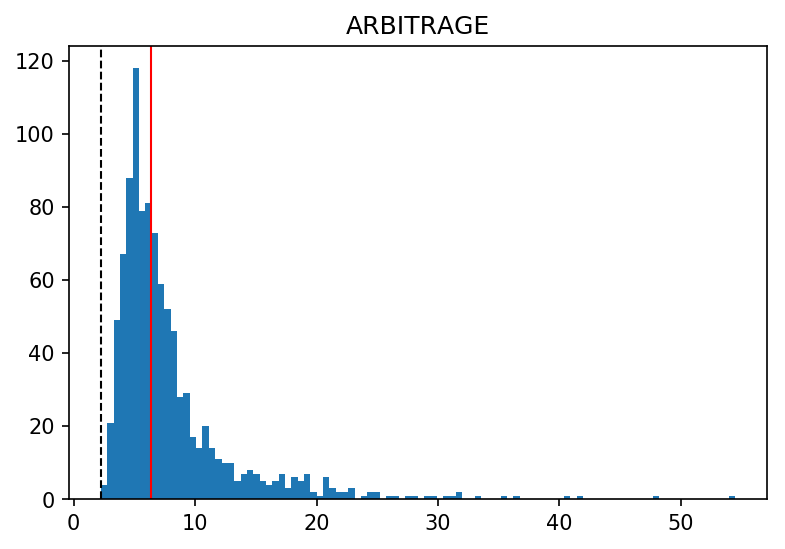

3-6 tokens, DOWN

*BTC*: 0.4777
*HODL*: 0.3133
*5 MIN*: 0.1351, rebalances: 48695, tx_fee: $315121
*10 MIN*: 0.2163, rebalances: 26562, tx_fee: $190043
*30 MIN*: 0.2816, rebalances: 9427, tx_fee: $78977
*HOUR*: 0.2983, rebalances: 4793, tx_fee: $45355
*DAY*: 0.3048, rebalances: 204, tx_fee: $4651
*WEEK*: 0.3032, rebalances: 29, tx_fee: $1571
*2 WEEK*: 0.3063, rebalances: 14, tx_fee: $1027
*MONTH*: 0.3128, rebalances: 6, tx_fee: $645
*5%*: 0.3206, rebalances: 1221, tx_fee: $21911
*10%*: 0.3186, rebalances: 301, tx_fee: $8817
*20%*: 0.3179, rebalances: 82, tx_fee: $4023
*50%*: 0.3178, rebalances: 16, tx_fee: $1612
*100%*: 0.3136, rebalances: 5, tx_fee: $811
*ARBITRAGE*: 0.3019, rebalances: 24210, tx_fee: $29141, arbiter profit: $47525


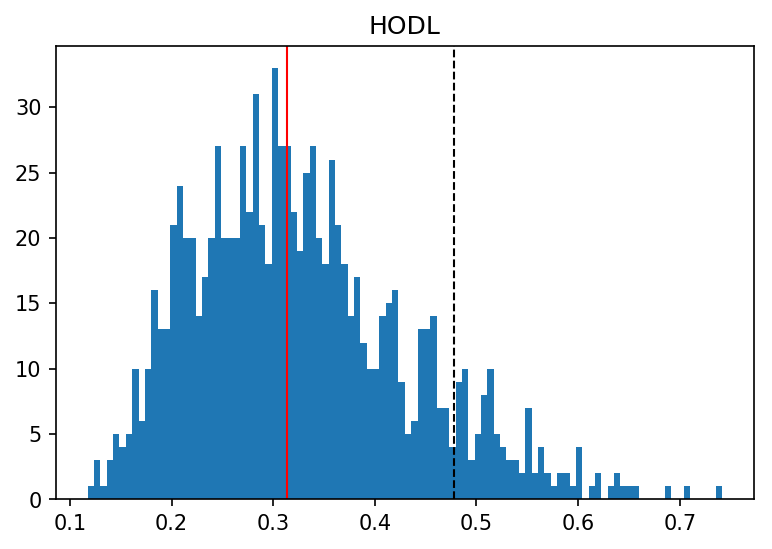

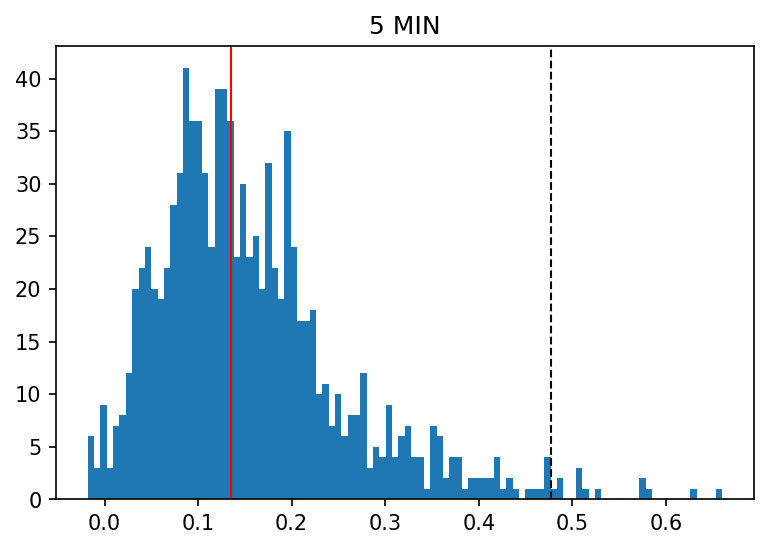

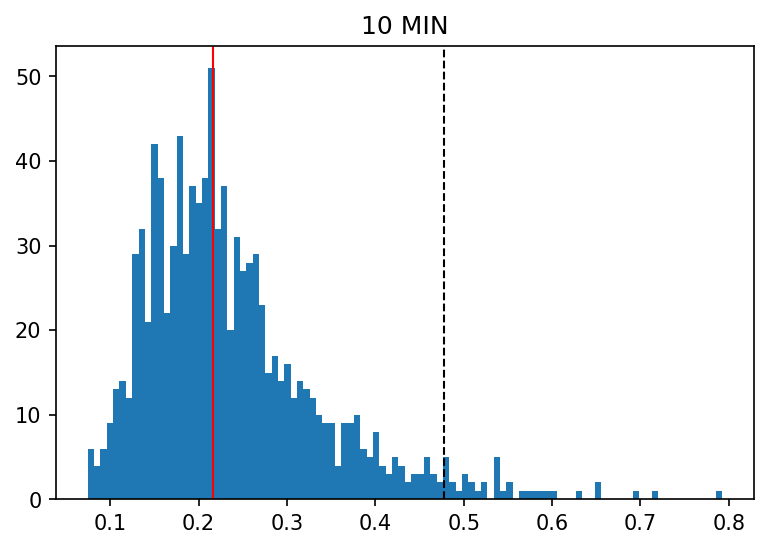

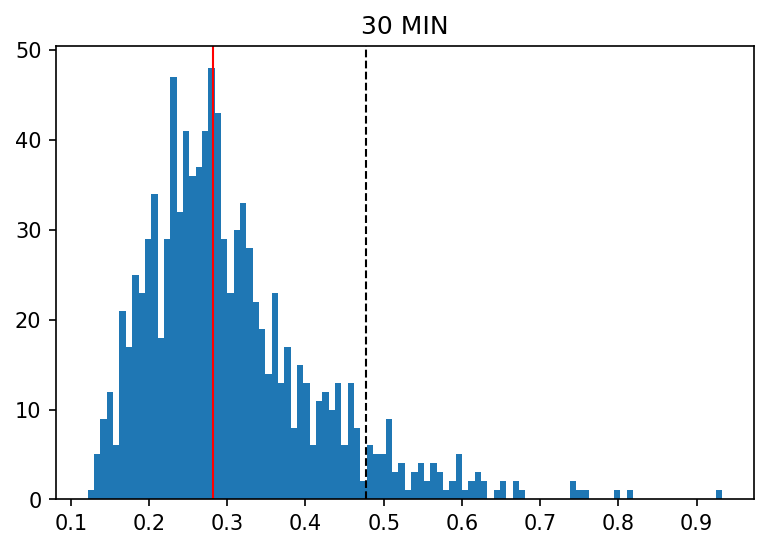

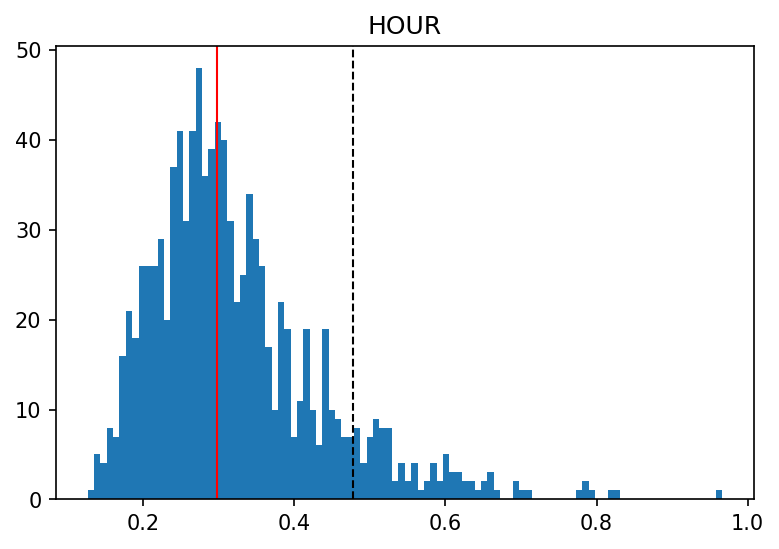

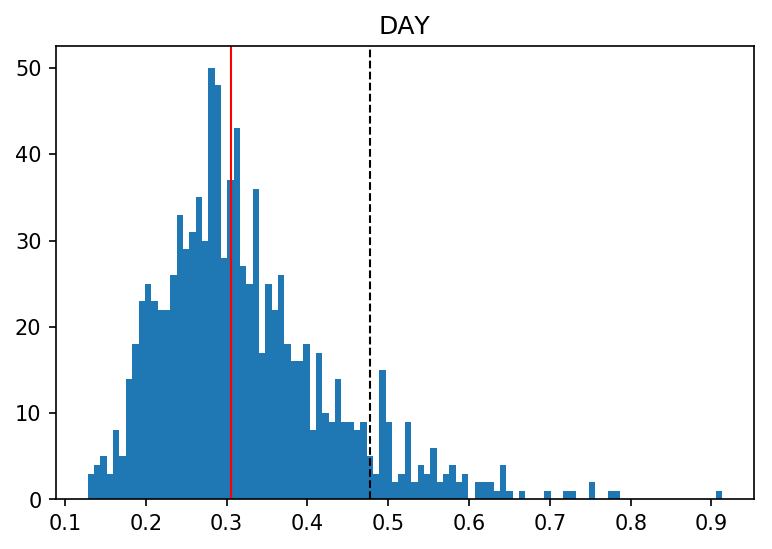

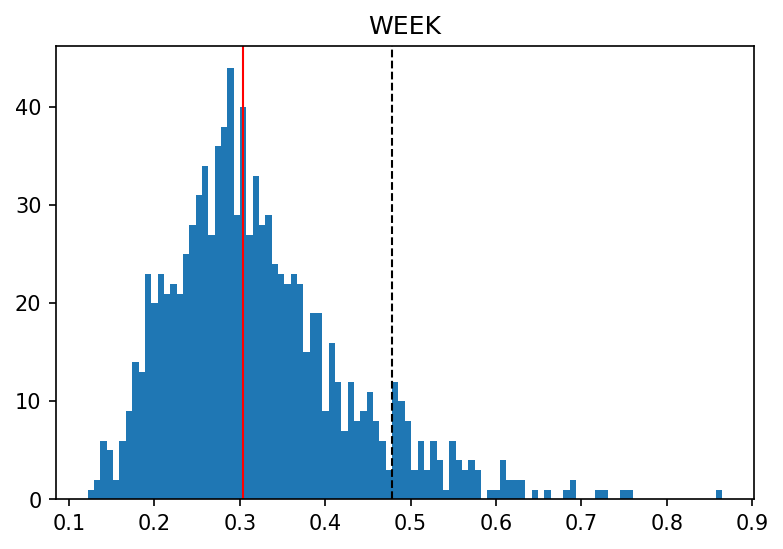

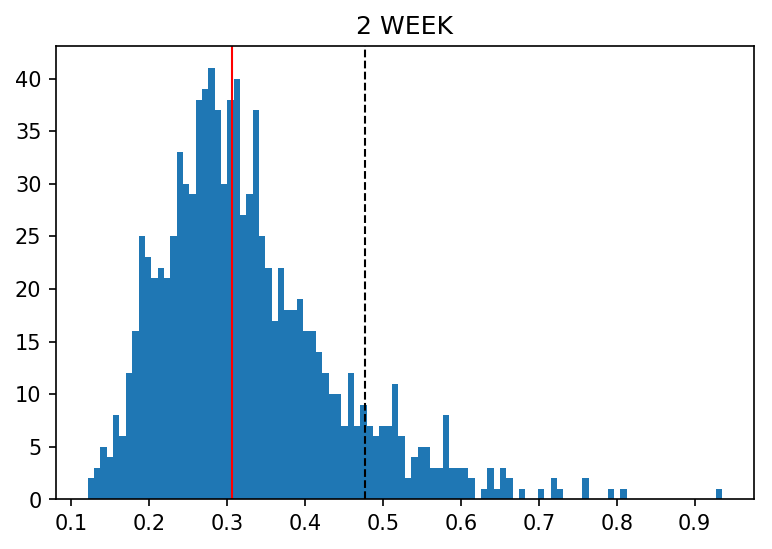

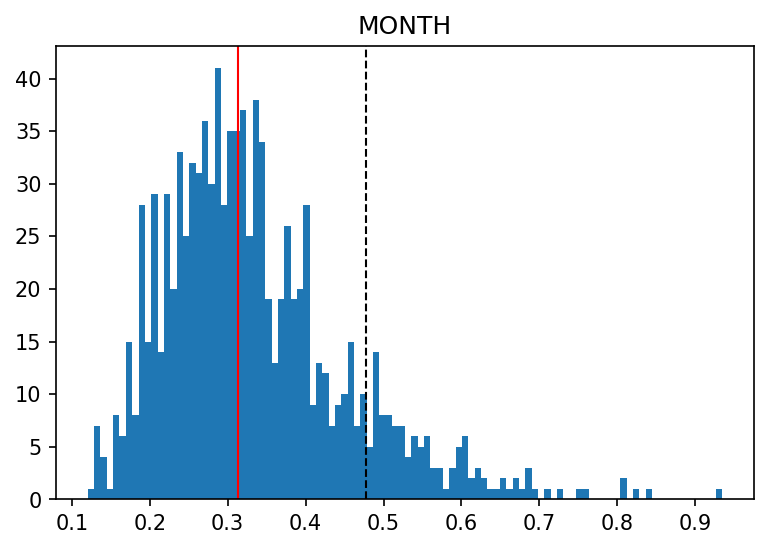

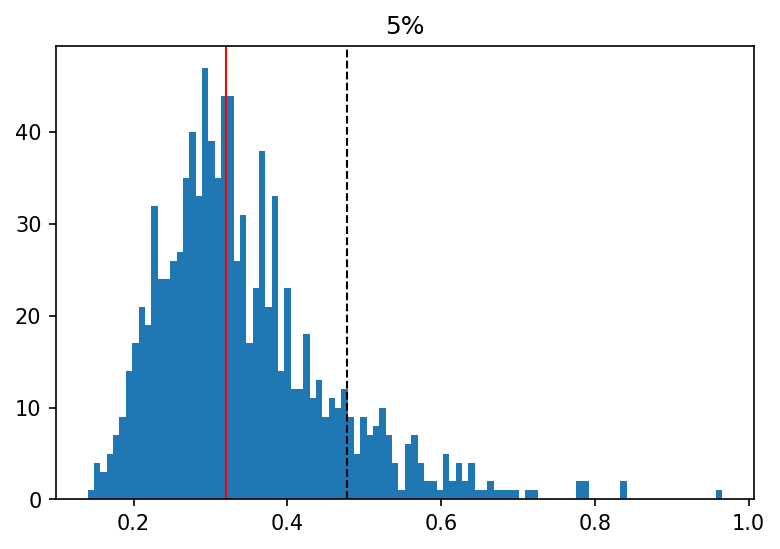

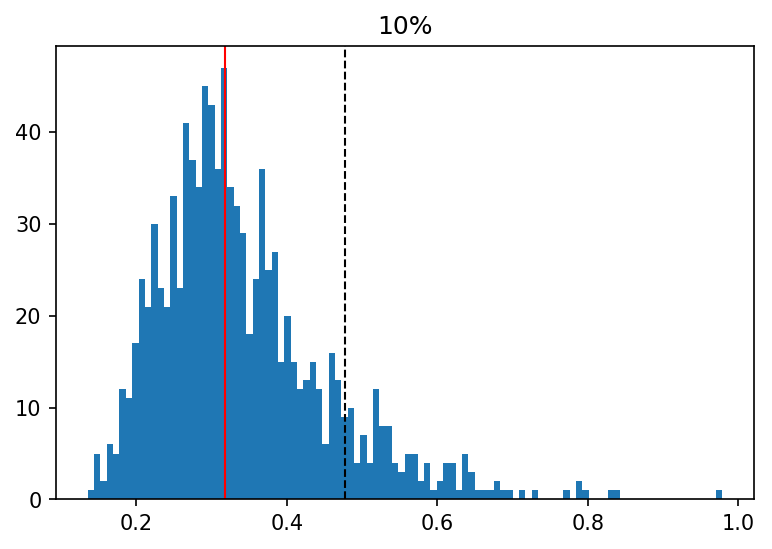

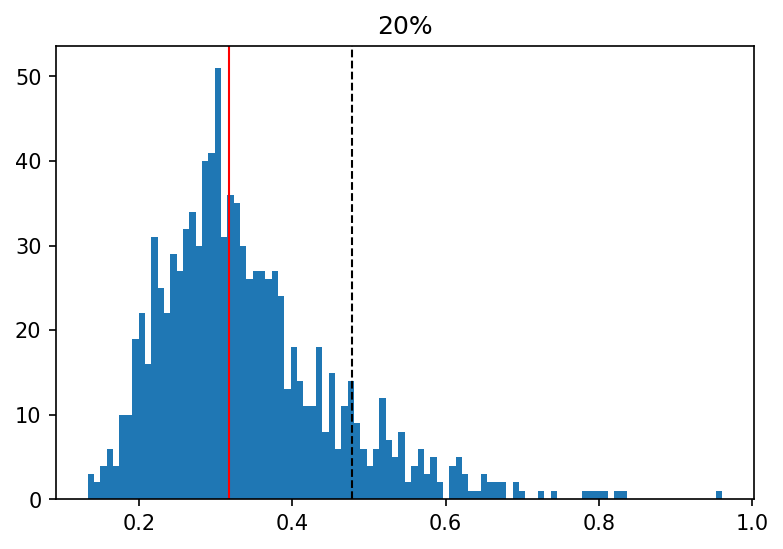

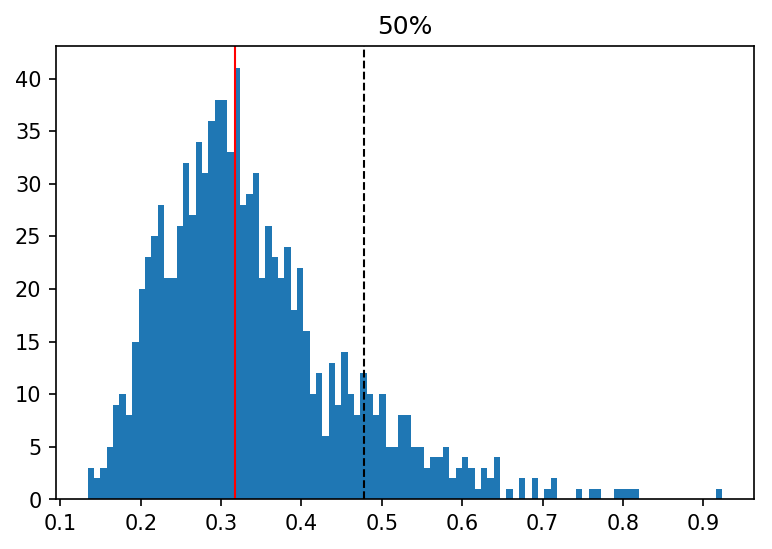

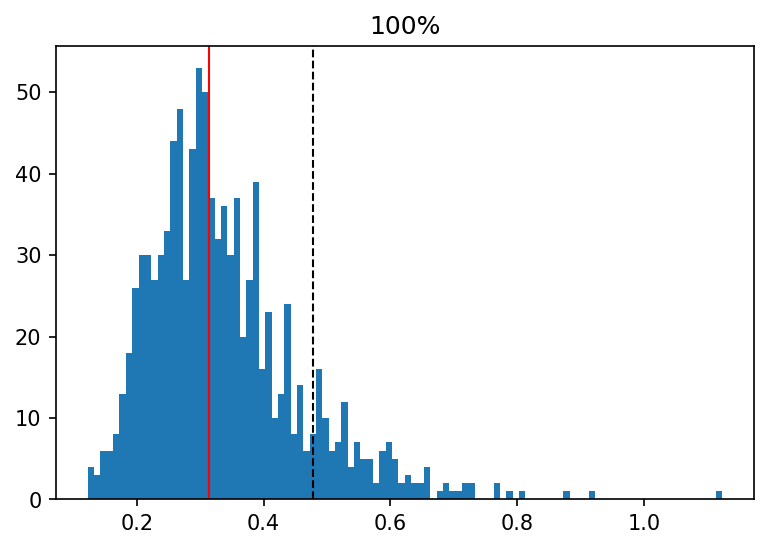

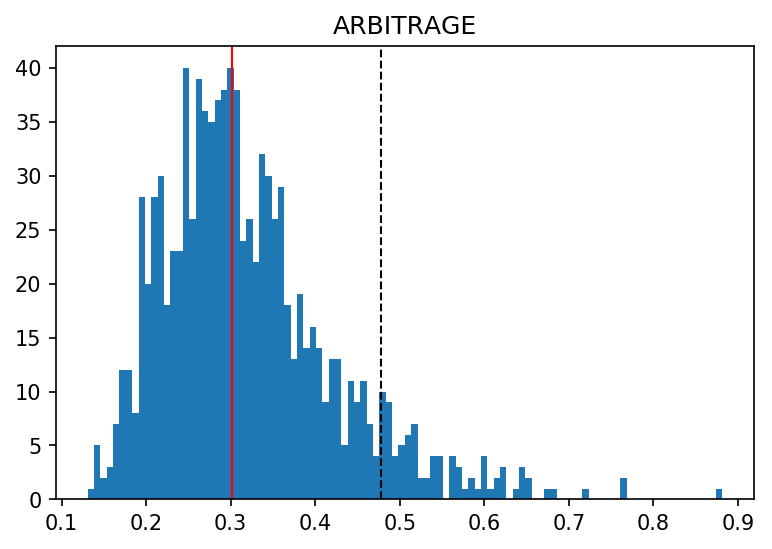

10-20 tokens, ALL

*BTC*: 1.0788
*HODL*: 2.5039
*5 MIN*: 1.8877, rebalances: 62731, tx_fee: $2335824
*10 MIN*: 2.2837, rebalances: 34218, tx_fee: $1435993
*30 MIN*: 2.5064, rebalances: 12145, tx_fee: $647224
*HOUR*: 2.4491, rebalances: 6174, tx_fee: $383436
*DAY*: 2.3732, rebalances: 262, tx_fee: $53617
*WEEK*: 2.4906, rebalances: 37, tx_fee: $21902
*2 WEEK*: 2.7574, rebalances: 18, tx_fee: $18962
*MONTH*: 3.2720, rebalances: 8, tx_fee: $18912
*5%*: 5.2942, rebalances: 13374, tx_fee: $1232114
*10%*: 4.4492, rebalances: 2886, tx_fee: $421982
*20%*: 3.9788, rebalances: 700, tx_fee: $170176
*50%*: 3.8527, rebalances: 137, tx_fee: $68664
*100%*: 3.7244, rebalances: 44, tx_fee: $39156
*ARBITRAGE*: 2.2603, rebalances: 190793, tx_fee: $258519, arbiter profit: $1467775


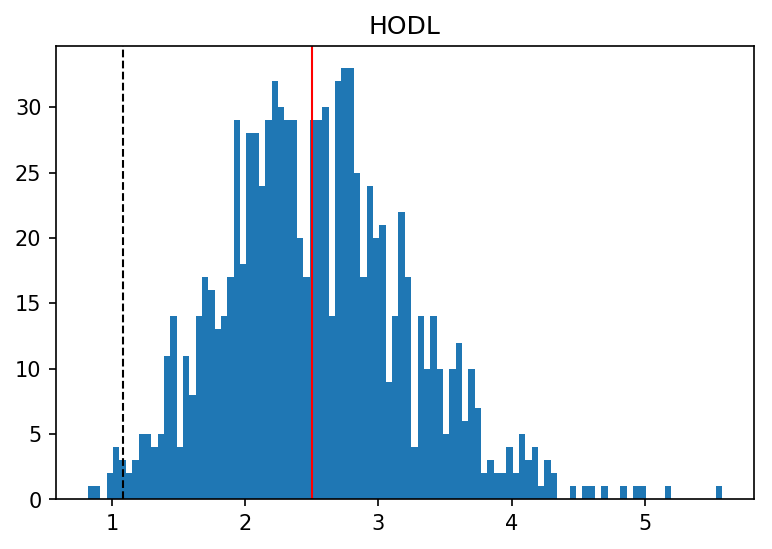

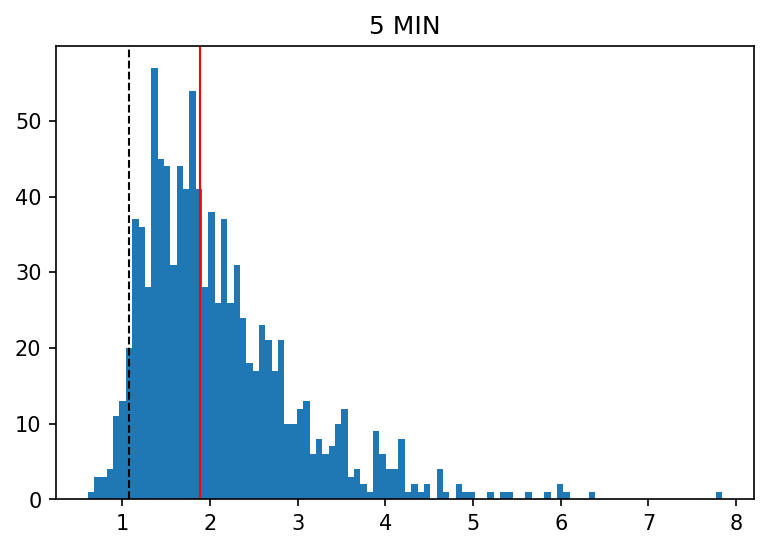

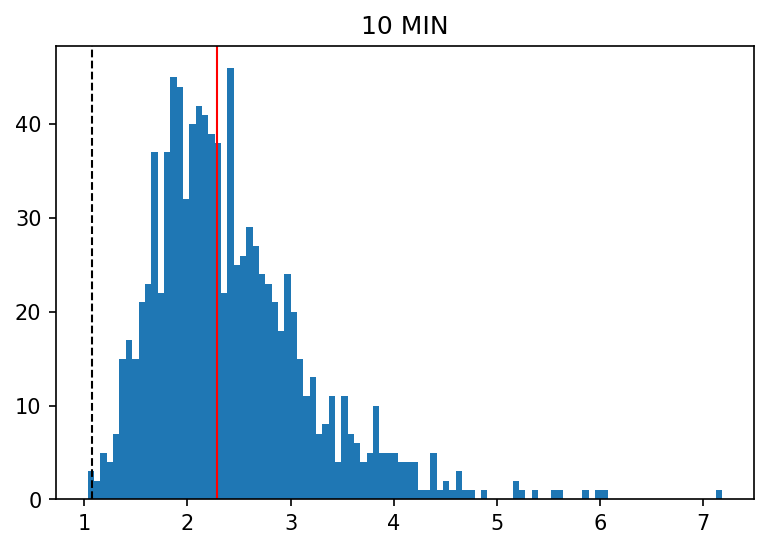

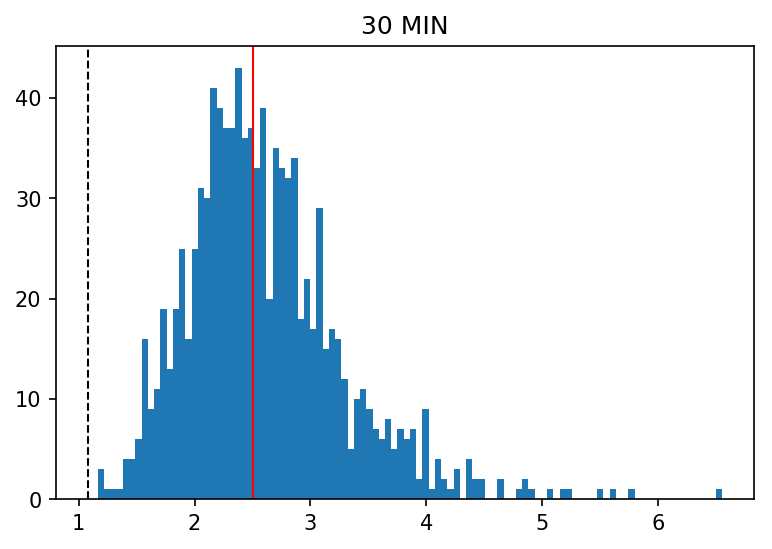

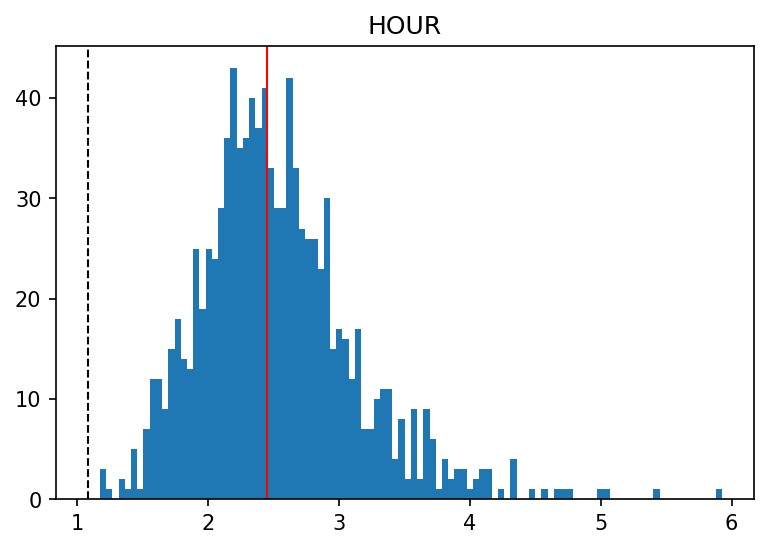

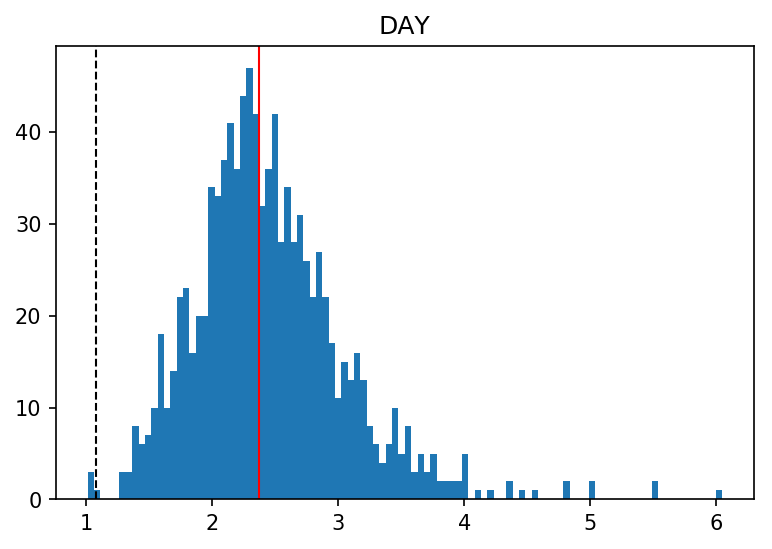

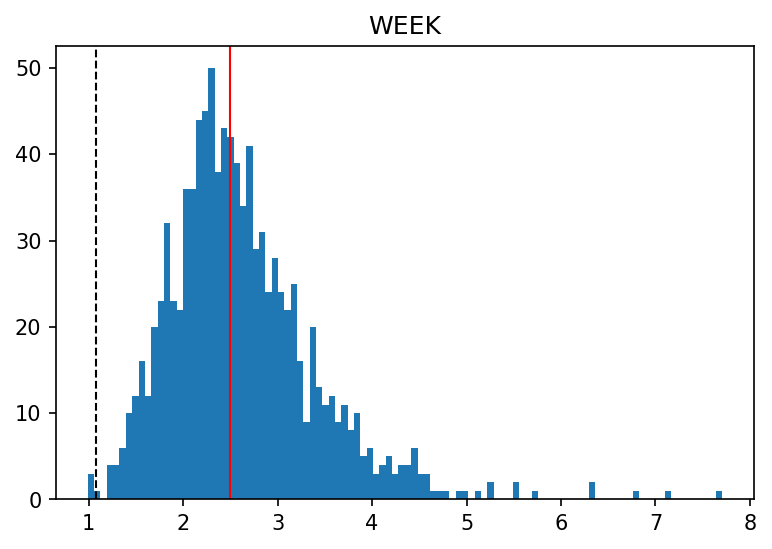

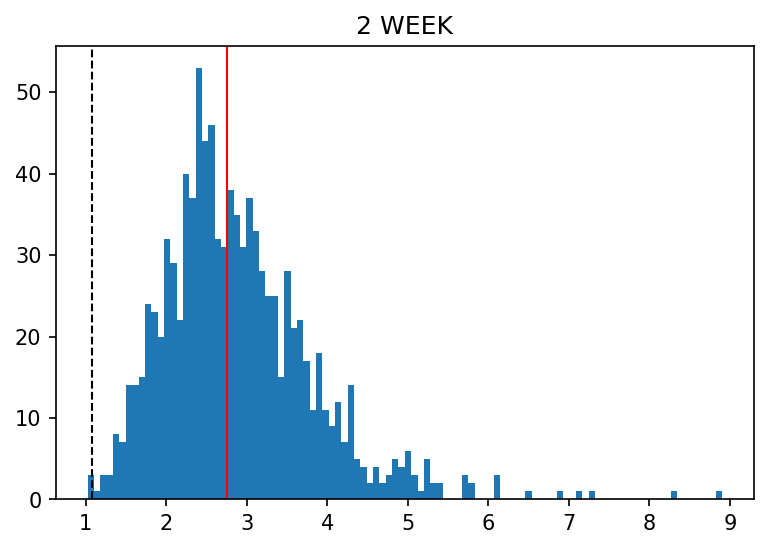

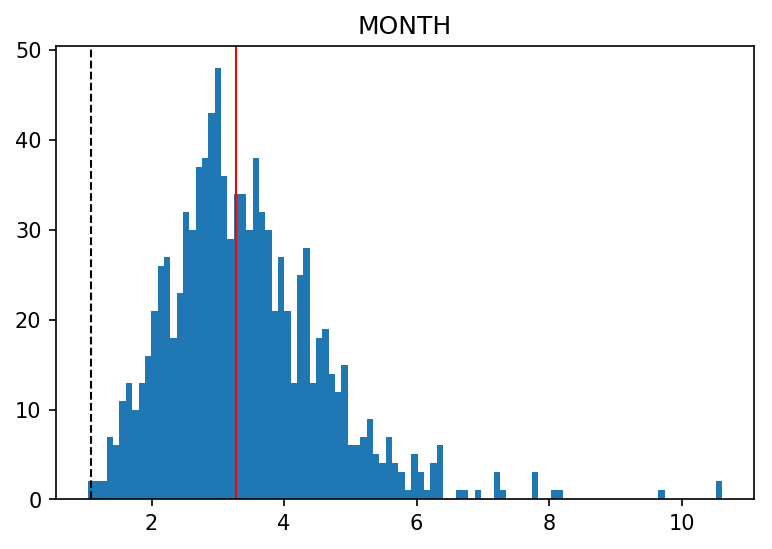

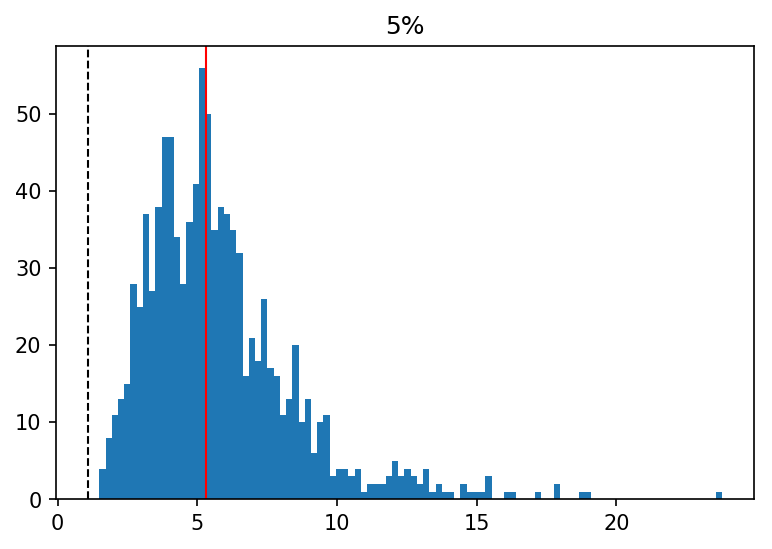

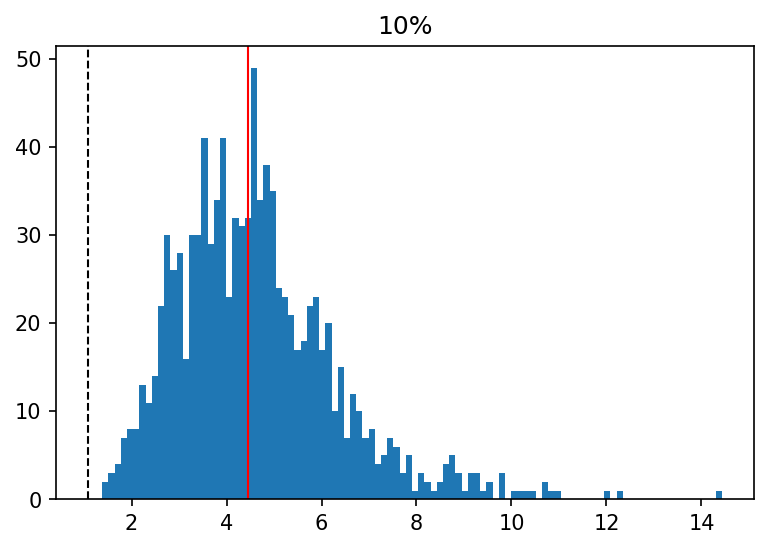

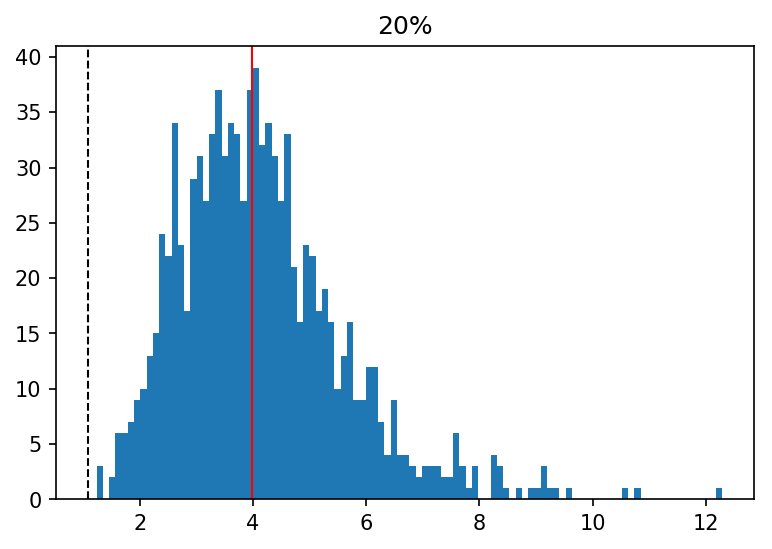

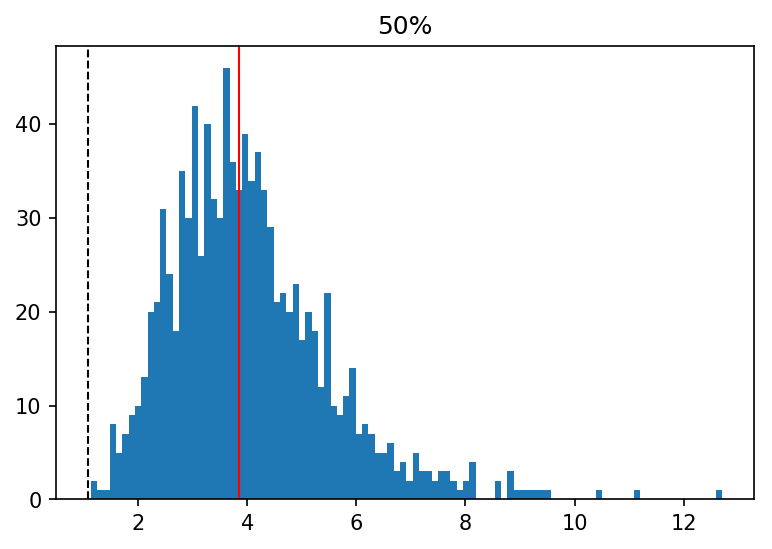

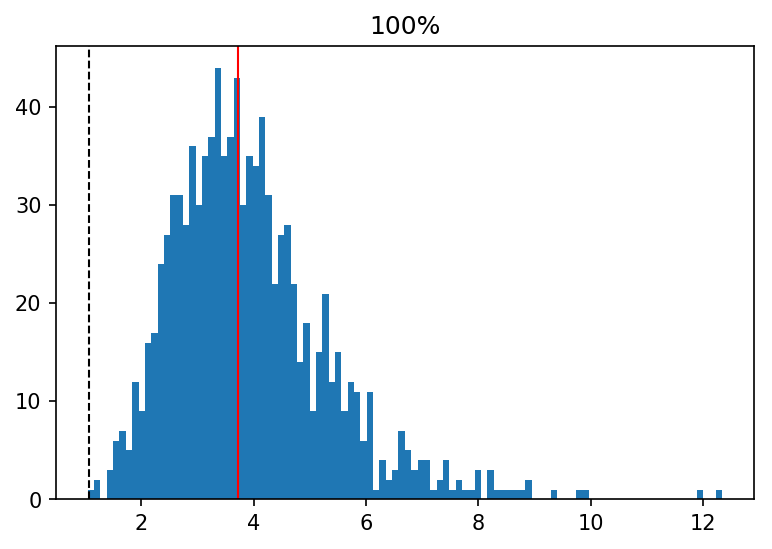

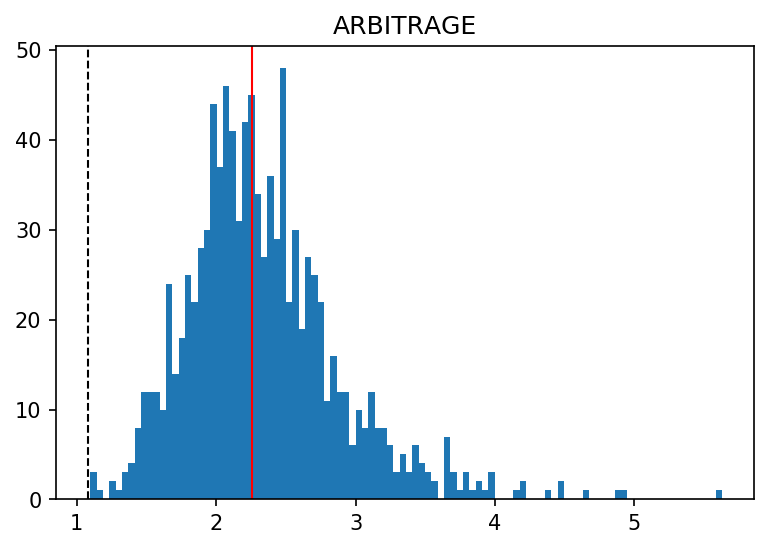

In [15]:
for title, filename in files.items():
    with open(filename) as in_f:
        all_stats = json.load(in_f)

    btc_profit = all_stats['BTC'][0]['profit_multiplier']

    logging.info(title)
    logging.info('')
    for name, stats in sorted(all_stats.items(), key=lambda x: order[x[0]]):
        log_stats(name, stats)

    for name, stats in sorted(all_stats.items(), key=lambda x: order[x[0]]):
        if name == 'BTC':
            continue
        draw_plot(name, stats, btc_profit)